Saving 1. Predict Loan Default.csv to 1. Predict Loan Default.csv

Evaluation Matrics:
Accuracy : 0.8878
Precision: 0.7021
Recall   : 0.0283


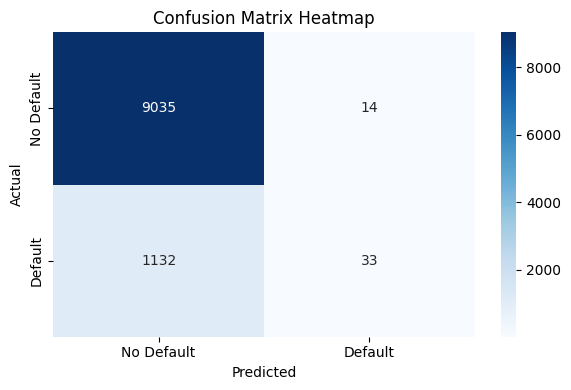

In [1]:
from google.colab import files
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#  Upload and load the dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# 🔍 Display the first few rows
#print("First 5 rows of the dataset:")
#print(df.head())

#  Drop 'LoanID' column if it exists
if 'LoanID' in df.columns:
    df = df.drop("LoanID", axis=1)

#  Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop("Default", axis=1)
y = df["Default"]

# 🧪 Sample 20% of data for faster training (optional)
df_sampled = df.sample(frac=0.2, random_state=42)
X = df_sampled.drop("Default", axis=1)
y = df_sampled["Default"]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

#  Predict on test data
y_pred = model.predict(X_test)

# 📊 Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 🖨 Print the evaluation results
print("\nEvaluation Matrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# 🔥 Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()